In [1]:
import numpy as np
import pylab as plt

In [2]:
bees = [2]
smoke = [4,5,6]

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

#We create a points-list map that represents each direction our bot can take. 
#Using this format allows us to easily create complex graphs but also easily visualize everything with networkx graphs.
#Our starting point is 0, our goal point is 7.

goal = 7

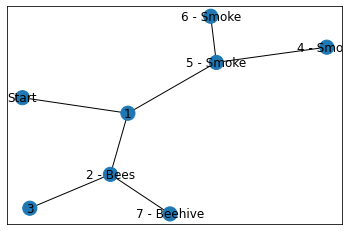

In [3]:
import networkx as nx

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [5]:
# how many points in graph? x points
matrix_size=8

# create matrix x*y
R= np.matrix(np.ones(shape=(matrix_size,matrix_size)))
R *= -1

for point in points_list:
    print(point)
    if point[1]==goal:
        R[point]=100    
    else:
        R[point]=0
    
    if point[0]==goal:
        R[point[::-1]]=100
    else:
        R[point[::-1]]=0 # reverse of point

# add goal point round trip
R[goal,goal]=100
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
# re-initialize the matrices for new run
Q=np.matrix(np.zeros([matrix_size,matrix_size]))

enviro_bees=np.matrix(np.zeros([matrix_size,matrix_size]))
enviro_smoke=np.matrix(np.zeros([matrix_size,matrix_size]))

gamma=0.8
initial_state=1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

available_act = available_actions(initial_state)

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_bees[current_state, action] += 1

    if 's' in environment: 
        enviro_smoke[current_state, action] += 1

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores= []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 244.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 295.

max_value 399.97822192851714
max_value 319.91692325026355
max_value 255.93353860021085
max_value 319.91692325026355
max_value 399.97822192851714
max_value 319.9825775428137
max_value 255.93353860021085
max_value 499.9727774106464
max_value 255.93353860021085
max_value 255.93353860021085
max_value 255.93353860021085
max_value 255.98606203425098
max_value 319.9825775428137
max_value 319.9825775428137
max_value 399.97822192851714
max_value 255.98606203425098
max_value 319.9825775428137
max_value 319.9825775428137
max_value 319.9825775428137
max_value 319.9825775428137
max_value 255.98606203425098
max_value 255.98606203425098
max_value 255.98606203425098
max_value 499.9727774106464
max_value 255.98606203425098
max_value 319.9825775428137
max_value 499.9727774106464
max_value 399.97822192851714
max_value 499.97822192851714
max_value 319.9825775428137
max_value 255.98606203425098
max_value 399.97822192851714
max_value 319.9825775428137
max_value 499.9825775428137
max_value 255.98606203425098

In [9]:
# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

Bees Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 37.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 78.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 37.  0.  0.  0.  0.  0.]]
Smoke Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 36.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 91.  0.  0.]
 [ 0.  0.  0.  0. 25.  0. 26.  0.]
 [ 0.  0.  0.  0.  0. 78.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [11]:
Q = np.matrix(np.zeros([matrix_size,matrix_size]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

print(enviro_matrix)

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm

[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  37.   0.   0. -36.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  78.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -91.   0.   0.]
 [  0.   0.   0.   0. -25.   0. -26.   0.]
 [  0.   0.   0.   0.   0. -78.   0.   0.]
 [  0.   0.  37.   0.   0.   0.   0.   0.]]


max_value 0.0
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: n

<ipython-input-12-12eca6b166a7>:20: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(Q/np.max(Q)*100))


849.1413782421521
max_value 251.38831398157268
Score: 849.1413782421521
max_value 251.38831398157268
Score: 849.1413782421521
max_value 251.38831398157268
Score: 849.1413782421521
max_value 490.99280074525905
Score: 849.1413782421521
max_value 314.23539247696584
Score: 849.1413782421521
max_value 490.99280074525905
Score: 849.1413782421521
max_value 314.23539247696584
Score: 849.1413782421521
max_value 490.99280074525905
Score: 849.6000000000001
going from: [1 4 6]
to: [1]
max_value 314.23539247696584
Score: 849.6000000000001
max_value 251.38831398157268
Score: 849.6000000000001
max_value 251.38831398157268
Score: 849.6000000000001
going from: [0 2 5]
to: [0 2]
max_value 251.38831398157268
Score: 849.6000000000001
max_value 392.79424059620726
Score: 849.6000000000001
going from: [1 4 6]
to: [1]
max_value 314.23539247696584
Score: 849.6000000000001
max_value 392.79424059620726
Score: 849.6000000000001
max_value 492.79424059620726
Score: 846.8597907990219
max_value 492.79424059620726
Sco

Score: 848.6254514940238
max_value 399.6038591874288
Score: 848.6254514940238
max_value 255.68308734994304
Score: 848.6254514940238
max_value 499.50482398428596
Score: 848.6502348390455
max_value 255.68308734994304
Score: 848.6502348390455
going from: [0 2 5]
to: [0 2]
max_value 399.6038591874288
Score: 848.6502348390455
max_value 499.6038591874288
Score: 848.501831805869
max_value 255.68308734994304
Score: 848.501831805869
max_value 499.68308734994304
Score: 848.4029713366858
going from: [0 2 5]
to: [0 2]
max_value 399.7464698799545
Score: 848.4315115647096
going from: [0 2 5]
to: [0 2]
max_value 399.7464698799545
Score: 848.4315115647096
going from: [0 2 5]
to: [0 2]
max_value 399.7464698799545
Score: 848.4315115647096
going from: [0 2 5]
to: [0 2]
max_value 399.7464698799545
Score: 848.4315115647096
going from: [1 4 6]
to: [1]
max_value 319.7971759039636
Score: 848.4701994293639
max_value 399.7464698799545
Score: 848.4987396573877
max_value 319.7971759039636
Score: 848.7605722492051

Score: 849.4461964458392
going from: [1 4 6]
to: [1]
max_value 319.91692325026355
Score: 849.4461964458392
going from: [1 4 6]
to: [1]
max_value 319.91692325026355
Score: 849.4461964458392
max_value 499.97822192851714
Score: 849.4585532040544
max_value 255.93353860021085
Score: 849.4585532040544
going from: [1 4 6]
to: [1]
max_value 319.91692325026355
Score: 849.4585532040544
max_value 399.9825775428137
Score: 849.4758386529388
max_value 255.93353860021085
Score: 849.4758386529388
going from: [1 4 6]
to: [1]
max_value 319.91692325026355
Score: 849.4758386529388
max_value 399.9825775428137
Score: 849.4758386529388
max_value 319.91692325026355
Score: 849.4758386529388
max_value 499.97822192851714
Score: 849.4769276039434
max_value 399.9825775428137
Score: 849.4769276039434
max_value 499.9825775428137
Score: 849.4703985115962
max_value 255.93353860021085
Score: 849.4703985115962
max_value 255.93353860021085
Score: 849.4703985115962
going from: [0 2 5]
to: [0 2]
max_value 399.9825775428137

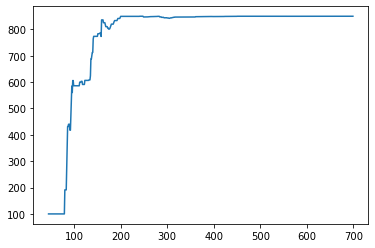

In [12]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)
enviro_matrix_snap=enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

#training
scores=[]
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

plt.plot(scores)
plt.show()